# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities: 
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
url="http://api.openweathermap.org/data/2.5/weather?"
#units: imperial or metric
units="imperial"
query_url=f"{url}appid={weather_api_key}&units={units}&q="

#empty arrays will store weather data for cities
temp=[]
latitude=[]
longitude=[]
clouds=[]
humid=[]
wind=[]
cityname=[]

#error handling for cities that do not have weather data
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        #check the json format for calls
        #pprint(response)
        cityname.append(response['name'])
        temp.append(response['main']['temp'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        print(f"The temp in {cities.index(city)}:{city} is {response['main']['temp']}. Lat: {response['coord']['lat']}. Long: {response['coord']['lon']}")
    except: 
        print (f"{cities.index(city)}:{city} not found.")
        
#check list lengths to make sure they all match prior to joining in dataframe (part of early troubleshooting)
print(f"Cities: {len(cities)}")
print(f"Lats: {len(latitude)}")
print(f"Longs: {len(longitude)}")
print(f"Temp: {len(temp)}")
print(f"clouds: {len(clouds)}")
print(f"humid: {len(humid)}")
print(f"wind: {len(wind)}")
        

The temp in 0:yar-sale is 5.25. Lat: 66.83. Long: 70.83
1:samusu not found.
The temp in 2:honningsvag is 37.4. Lat: 70.98. Long: 25.97
The temp in 3:pilar is 75.2. Lat: -9.6. Long: -35.96
4:barentsburg not found.
The temp in 5:agirish is 24.53. Lat: 61.92. Long: 63.02
The temp in 6:kishni is 66.25. Lat: 27.02. Long: 79.26
The temp in 7:boende is 68.5. Lat: -0.22. Long: 20.87
The temp in 8:alihe is 23.13. Lat: 50.57. Long: 123.72
The temp in 9:mataura is 57. Lat: -46.19. Long: 168.86
The temp in 10:antofagasta is 64.4. Lat: -23.65. Long: -70.4
The temp in 11:vaini is 78.8. Lat: -21.2. Long: -175.2
The temp in 12:muroto is 46.4. Lat: 33.28. Long: 134.15
The temp in 13:comodoro rivadavia is 69.8. Lat: -45.87. Long: -67.5
The temp in 14:cap malheureux is 73.99. Lat: -19.98. Long: 57.61
The temp in 15:narbonne is 58.46. Lat: 43.08. Long: 2.83
The temp in 16:khatanga is -7.11. Lat: 71.97. Long: 102.5
The temp in 17:macau is 69.06. Lat: 22.2. Long: 113.55
18:sentyabrskiy not found.
The temp i

The temp in 148:qaqortoq is 24.03. Lat: 60.72. Long: -46.03
The temp in 149:saskylakh is -4.22. Lat: 71.92. Long: 114.08
The temp in 150:fort nelson is 3.2. Lat: 58.81. Long: -122.7
151:saleaula not found.
The temp in 152:inongo is 73.62. Lat: -1.95. Long: 18.27
The temp in 153:esso is 18. Lat: 55.93. Long: 158.7
The temp in 154:chokurdakh is -12.32. Lat: 70.63. Long: 147.92
The temp in 155:santa isabel do rio negro is 83.89. Lat: -0.41. Long: -65.02
The temp in 156:vao is 71.74. Lat: -22.67. Long: 167.48
The temp in 157:shingu is 52.3. Lat: 33.73. Long: 135.98
The temp in 158:saint-georges is 84.2. Lat: 12.06. Long: -61.75
The temp in 159:riyadh is 71.6. Lat: 24.69. Long: 46.72
The temp in 160:kota belud is 75.11. Lat: 6.35. Long: 116.43
The temp in 161:hithadhoo is 82.49. Lat: -0.6. Long: 73.08
The temp in 162:sept-iles is 40.59. Lat: 50.2. Long: -66.38
The temp in 163:luderitz is 68.92. Lat: -26.65. Long: 15.16
The temp in 164:astana is 21.2. Lat: 51.18. Long: 71.45
The temp in 165:

294:satitoa not found.
The temp in 295:krasnoselkup is 9.18. Lat: 65.7. Long: 82.47
The temp in 296:gumdag is 51.35. Lat: 39.21. Long: 54.59
The temp in 297:kieta is 83.14. Lat: -6.22. Long: 155.63
The temp in 298:viedma is 73. Lat: -40.81. Long: -63
The temp in 299:rio cuarto is 77. Lat: -33.13. Long: -64.35
The temp in 300:vestmanna is 41. Lat: 62.16. Long: -7.17
The temp in 301:muisne is 82.4. Lat: 0.6. Long: -80.03
The temp in 302:erenhot is 32.47. Lat: 43.65. Long: 111.98
The temp in 303:stephenville is 75.07. Lat: 32.22. Long: -98.2
The temp in 304:chicama is 66.2. Lat: -7.84. Long: -79.15
The temp in 305:sao filipe is 80.58. Lat: 14.9. Long: -24.5
The temp in 306:sitka is 42.8. Lat: 57.05. Long: -135.33
The temp in 307:clyde river is 23. Lat: 70.47. Long: -68.59
The temp in 308:trincomalee is 81.75. Lat: 8.57. Long: 81.23
The temp in 309:liyang is 53.01. Lat: 29.71. Long: 118.29
The temp in 310:bam is 65.44. Lat: 29.11. Long: 58.36
The temp in 311:la oroya is 53.58. Lat: -11.52.

The temp in 442:liverpool is 53.04. Lat: 53.41. Long: -2.98
The temp in 443:teguise is 69.8. Lat: 29.06. Long: -13.56
The temp in 444:copiapo is 62.6. Lat: -27.37. Long: -70.33
The temp in 445:lavrentiya is 32.34. Lat: 65.58. Long: -171
The temp in 446:basco is 79.36. Lat: 20.45. Long: 121.97
The temp in 447:tarsus is 58.19. Lat: 36.92. Long: 34.88
The temp in 448:green river is 28.4. Lat: 41.53. Long: -109.47
The temp in 449:papara is 81.66. Lat: -3.98. Long: -38.73
The temp in 450:stornoway is 52.52. Lat: 58.21. Long: -6.39
The temp in 451:gilgit is 53.26. Lat: 35.92. Long: 74.31
The temp in 452:pandan is 79.72. Lat: 14.05. Long: 124.17
The temp in 453:praia da vitoria is 59. Lat: 38.73. Long: -27.07
The temp in 454:shimoda is 45. Lat: 34.67. Long: 138.95
The temp in 455:alta floresta is 83.52. Lat: -9.88. Long: -56.09
The temp in 456:kyzyl-mazhalyk is 20.01. Lat: 51.13. Long: 90.6
The temp in 457:longyan is 48.99. Lat: 25.11. Long: 117.02
The temp in 458:fallon is 47.62. Lat: 39.47.

The temp in 589:mehamn is 37.4. Lat: 71.04. Long: 27.85
The temp in 590:san vicente is 71.24. Lat: -26.62. Long: -54.13
591:buon me thuot not found.
The temp in 592:bubaque is 84.25. Lat: 11.28. Long: -15.83
The temp in 593:mayumba is 78.19. Lat: -3.43. Long: 10.66
The temp in 594:vega de alatorre is 80.26. Lat: 20.03. Long: -96.63
The temp in 595:nome is 33.31. Lat: 64.5. Long: -165.41
The temp in 596:clarksville is 56.91. Lat: 36.53. Long: -87.36
The temp in 597:zlitan is 68.27. Lat: 32.47. Long: 14.57
The temp in 598:mucuri is 76.12. Lat: -18.09. Long: -39.55
The temp in 599:svetlaya is 36.28. Lat: 46.54. Long: 138.33
The temp in 600:kangavar is 48.2. Lat: 34.5. Long: 47.97
The temp in 601:kholmogory is 35.6. Lat: 64.22. Long: 41.66
The temp in 602:ust-tsilma is 28.33. Lat: 65.44. Long: 52.15
The temp in 603:bohodukhiv is 33.39. Lat: 50.16. Long: 35.53
The temp in 604:minbu is 70.92. Lat: 20.18. Long: 94.88
The temp in 605:abalak is 18.25. Lat: 58.13. Long: 68.59
The temp in 606:mar

In [20]:
len(cityname)

583

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#combine weather data to dictionary and array
weather_dict={
    "city":cityname,
    "lat":latitude,
    "long":longitude,
    "temp":temp,
    "clouds":clouds,
    "humid":humid,
    "wind":wind
}
weather_data=pd.DataFrame(weather_dict)
weather_data.head(10)

,city,lat,long,temp,clouds,humid,wind
0,Yar-Sale,66.83,70.83,5.25,94,95,9.60
1,Honningsvåg,70.98,25.97,37.40,0,74,19.46
2,Pilar,-9.60,-35.96,75.20,20,78,8.05
3,Agirish,61.92,63.02,24.53,100,98,9.98
4,Kishni,27.02,79.26,66.25,0,40,1.59
5,Boende,-0.22,20.87,68.50,17,97,2.53
6,Alihe,50.57,123.72,23.13,100,97,2.04
7,Mataura,-46.19,168.86,57.00,97,80,8.01
8,Antofagasta,-23.65,-70.40,64.40,20,68,17.22
9,Vaini,-21.20,-175.20,78.80,40,78,9.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#check for cities with out of range humidity: gt 100%

weather_data['humidity'] = pd.to_numeric(weather_data['humid'], errors='coerce')
weather_data['humidity'].describe()
#No places with humidity >100
#humid_df=weather_data.loc[weather_data["humidity"]>100]

count    583.000000
mean      73.790738
std       18.921363
min       15.000000
25%       66.500000
50%       78.000000
75%       88.000000
max      100.000000
Name: humidity, dtype: float64

In [6]:
#check cloudiness for out of range: Gt 100%

weather_data['clouds'] = pd.to_numeric(weather_data['clouds'], errors='coerce')
weather_data['clouds'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: clouds, dtype: float64

In [7]:
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity over 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# No cities with humidity over 100%

In [23]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv('weather.csv',index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

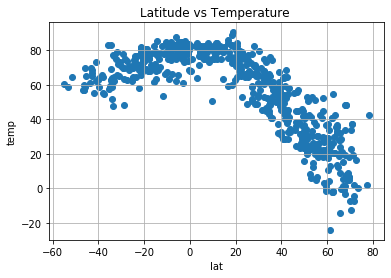

In [24]:
#define a function for creating scatter plots for various weather attributes by temperature
#input (data frame, x value, y value, title of plot)
#create scatter plot and export to .png
def my_plot(mydf, x, y, title):
    plt.scatter(mydf[x],mydf[y], marker="o")
    #new_title=title+" "+str(today)
    new_title=title+" "
    plt.title(new_title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.grid(True)
    #filename=title+"_"+str(today)+".png"
    filename=title+"_"+".png"
    plt.savefig(filename, format='png')
    plt.show()

my_plot(weather_data,'lat','temp','Latitude vs Temperature')

## Latitude vs. Humidity Plot

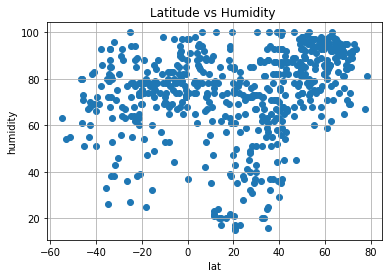

In [25]:
my_plot(weather_data,'lat','humidity','Latitude vs Humidity')

## Latitude vs. Cloudiness Plot

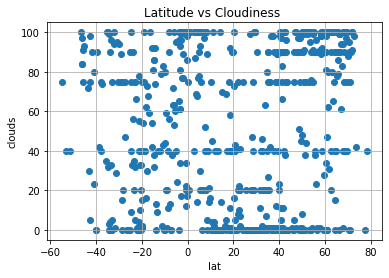

In [26]:
my_plot(weather_data,'lat','clouds','Latitude vs Cloudiness')

In [13]:
##Cloudiness does not appear to be related to latitude but it does appear to be measured by common break points such as 20%, 
##40%,75%, and 100%

## Latitude vs. Wind Speed Plot

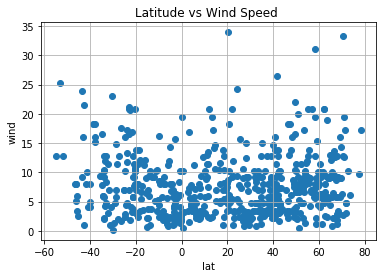

In [27]:
my_plot(weather_data,'lat','wind','Latitude vs Wind Speed')

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames
weather_data['lat'] = pd.to_numeric(weather_data['lat'], errors='coerce')
weather_data['lat'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: lat, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
north_data=weather_data.loc[weather_data['lat']>0]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
south_data=weather_data.loc[weather_data['lat']<0]

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [30]:
##my_reg(north_data,'lat','humidity','Humidity vs Lat North')
my_reg=(north_data,'lat','humidity','Humidity vs Lat North')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [31]:
my_reg=(south_data,'lat','humidity','Humidity vs Lat South')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [32]:
my_reg=(north_data,'lat','clouds','Cloudiness vs Lat North')    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [33]:
my_reg=(south_data,'lat','clouds','Cloudiness vs Lat South')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
my_reg=(north_data,'lat','wind','Wind Speed vs Lat North')    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
my_reg=(south_data,'lat','wind','Wind Speed vs Lat South')

In [52]:
##There is little relationship between wind speed and latitude in either hemisphere.